In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import sys, os
sys.path.append("../../lib")

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [2]:
from helpers import load_data

# load dataset
x, y = load_data()

In [3]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [9]:
from costs import compute_mse
from my_regressions import ridge_regression
from my_utils import build_poly

def cross_validation_k(y, x, k_indices, lambda_, degree, k):
    """return the loss of ridge regression."""
    # split indices
    te_indices = k_indices[k]
    index_list = [i for i in range(len(k_indices)) if i != k]
    tr_indices = k_indices[index_list].flatten()
    # get values for indices
    tr_x = build_poly(x[tr_indices], degree)
    te_x = build_poly(x[te_indices], degree)
    tr_y = y[tr_indices]
    te_y = y[te_indices]
    # compute losses
    w, loss_tr = ridge_regression(tr_y, tr_x, lambda_)
    loss_te = compute_mse(te_y, te_x, w)
    return loss_tr, loss_te

def cross_validation(y, x, k_indices, lambda_, degree):
    k_fold = len(k_indices)
    values = [cross_validation_k(y, x, k_indices, lambda_, degree, k) for k in range(k_fold)]
    return np.mean(values, axis=0)

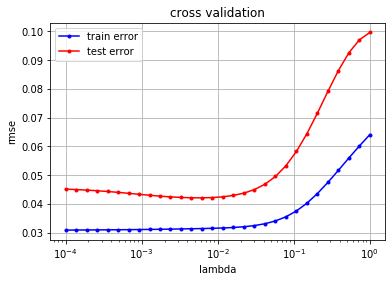

In [11]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # do it for all lambdas
    values = [cross_validation(y,x,k_indices,l,degree) for l in lambdas]
    # unzip cross_validation return values between training, test
    rmse_tr, rmse_te = [ i for i, _ in values ], [ j for _, j in values ]
    # visualize data
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

In [ ]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        raise NotImplementedError

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()